In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
airlines = pd.read_csv('airlines.csv')

In [3]:
if (airlines.isna().sum().any() == 0):
    print("~ There isn't any NA value.")

~ There isn't any NA value.


In [4]:
airlines.describe()

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


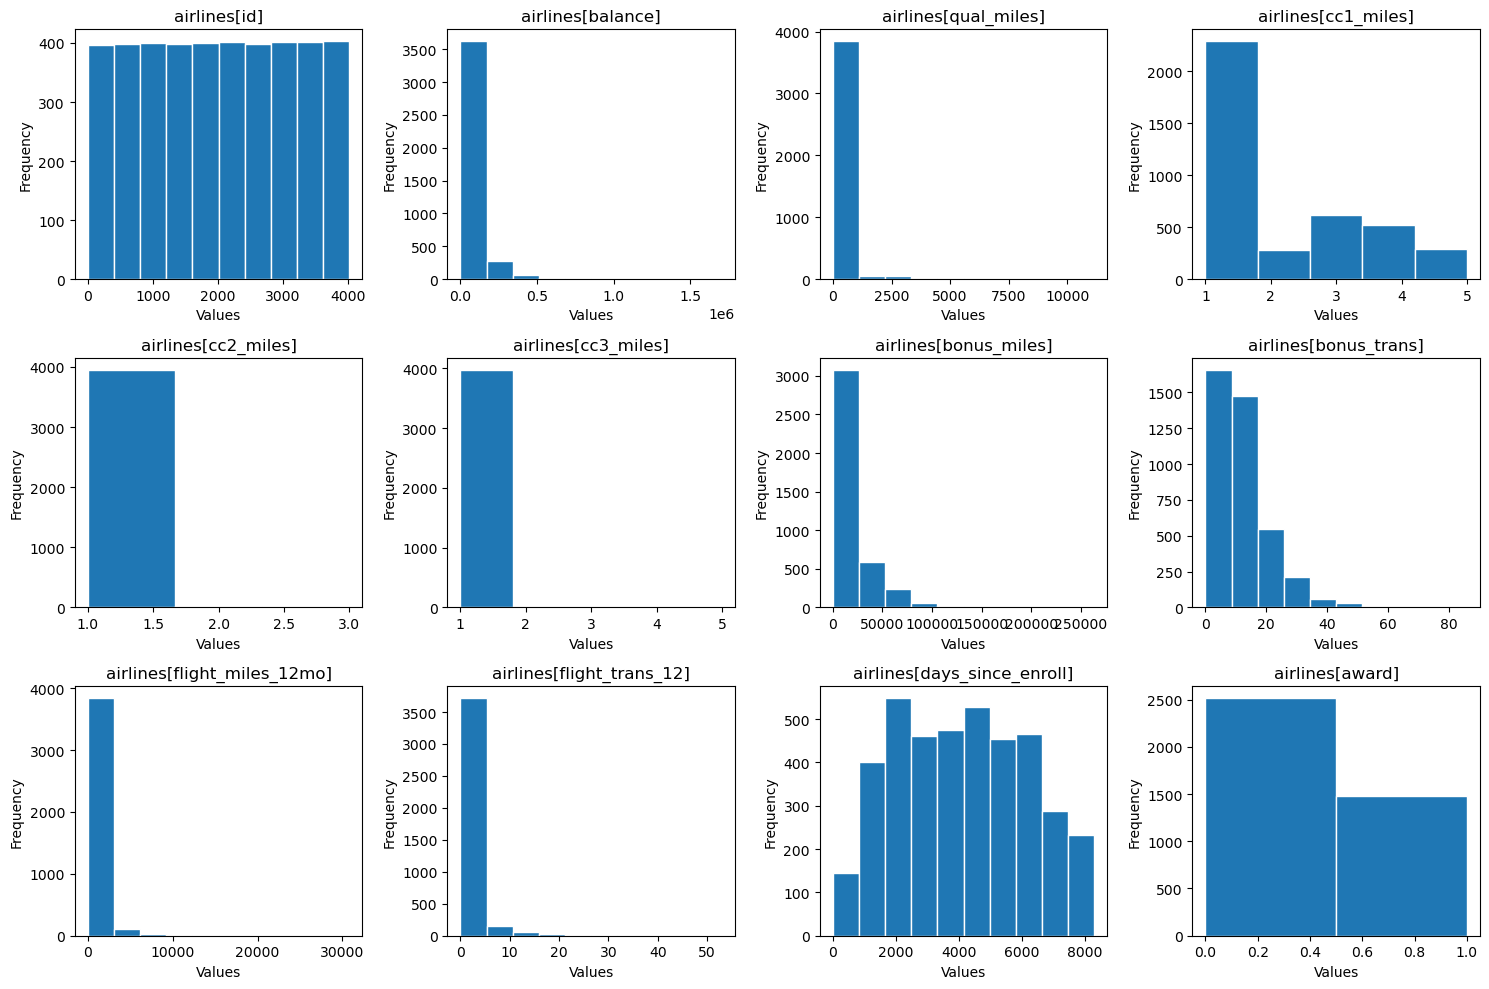

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

axes = axes.flatten()

for i, attr in enumerate(airlines.columns):
    if airlines[attr].nunique() <= 5:
        axes[i].hist(airlines[attr], edgecolor="white", bins=airlines[attr].nunique())
    else:
        axes[i].hist(airlines[attr], edgecolor="white", bins=10)
    axes[i].set_title(f"airlines[{attr}]")
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [6]:
perc_of_award = airlines["award"].sum() / len(airlines["award"])

print("Percentage of customers who has an award flight: ", perc_of_award)
print("Percentage of customers who doesn't have an award flight: ", 1-perc_of_award)

Percentage of customers who has an award flight:  0.3703425856464116
Percentage of customers who doesn't have an award flight:  0.6296574143535885


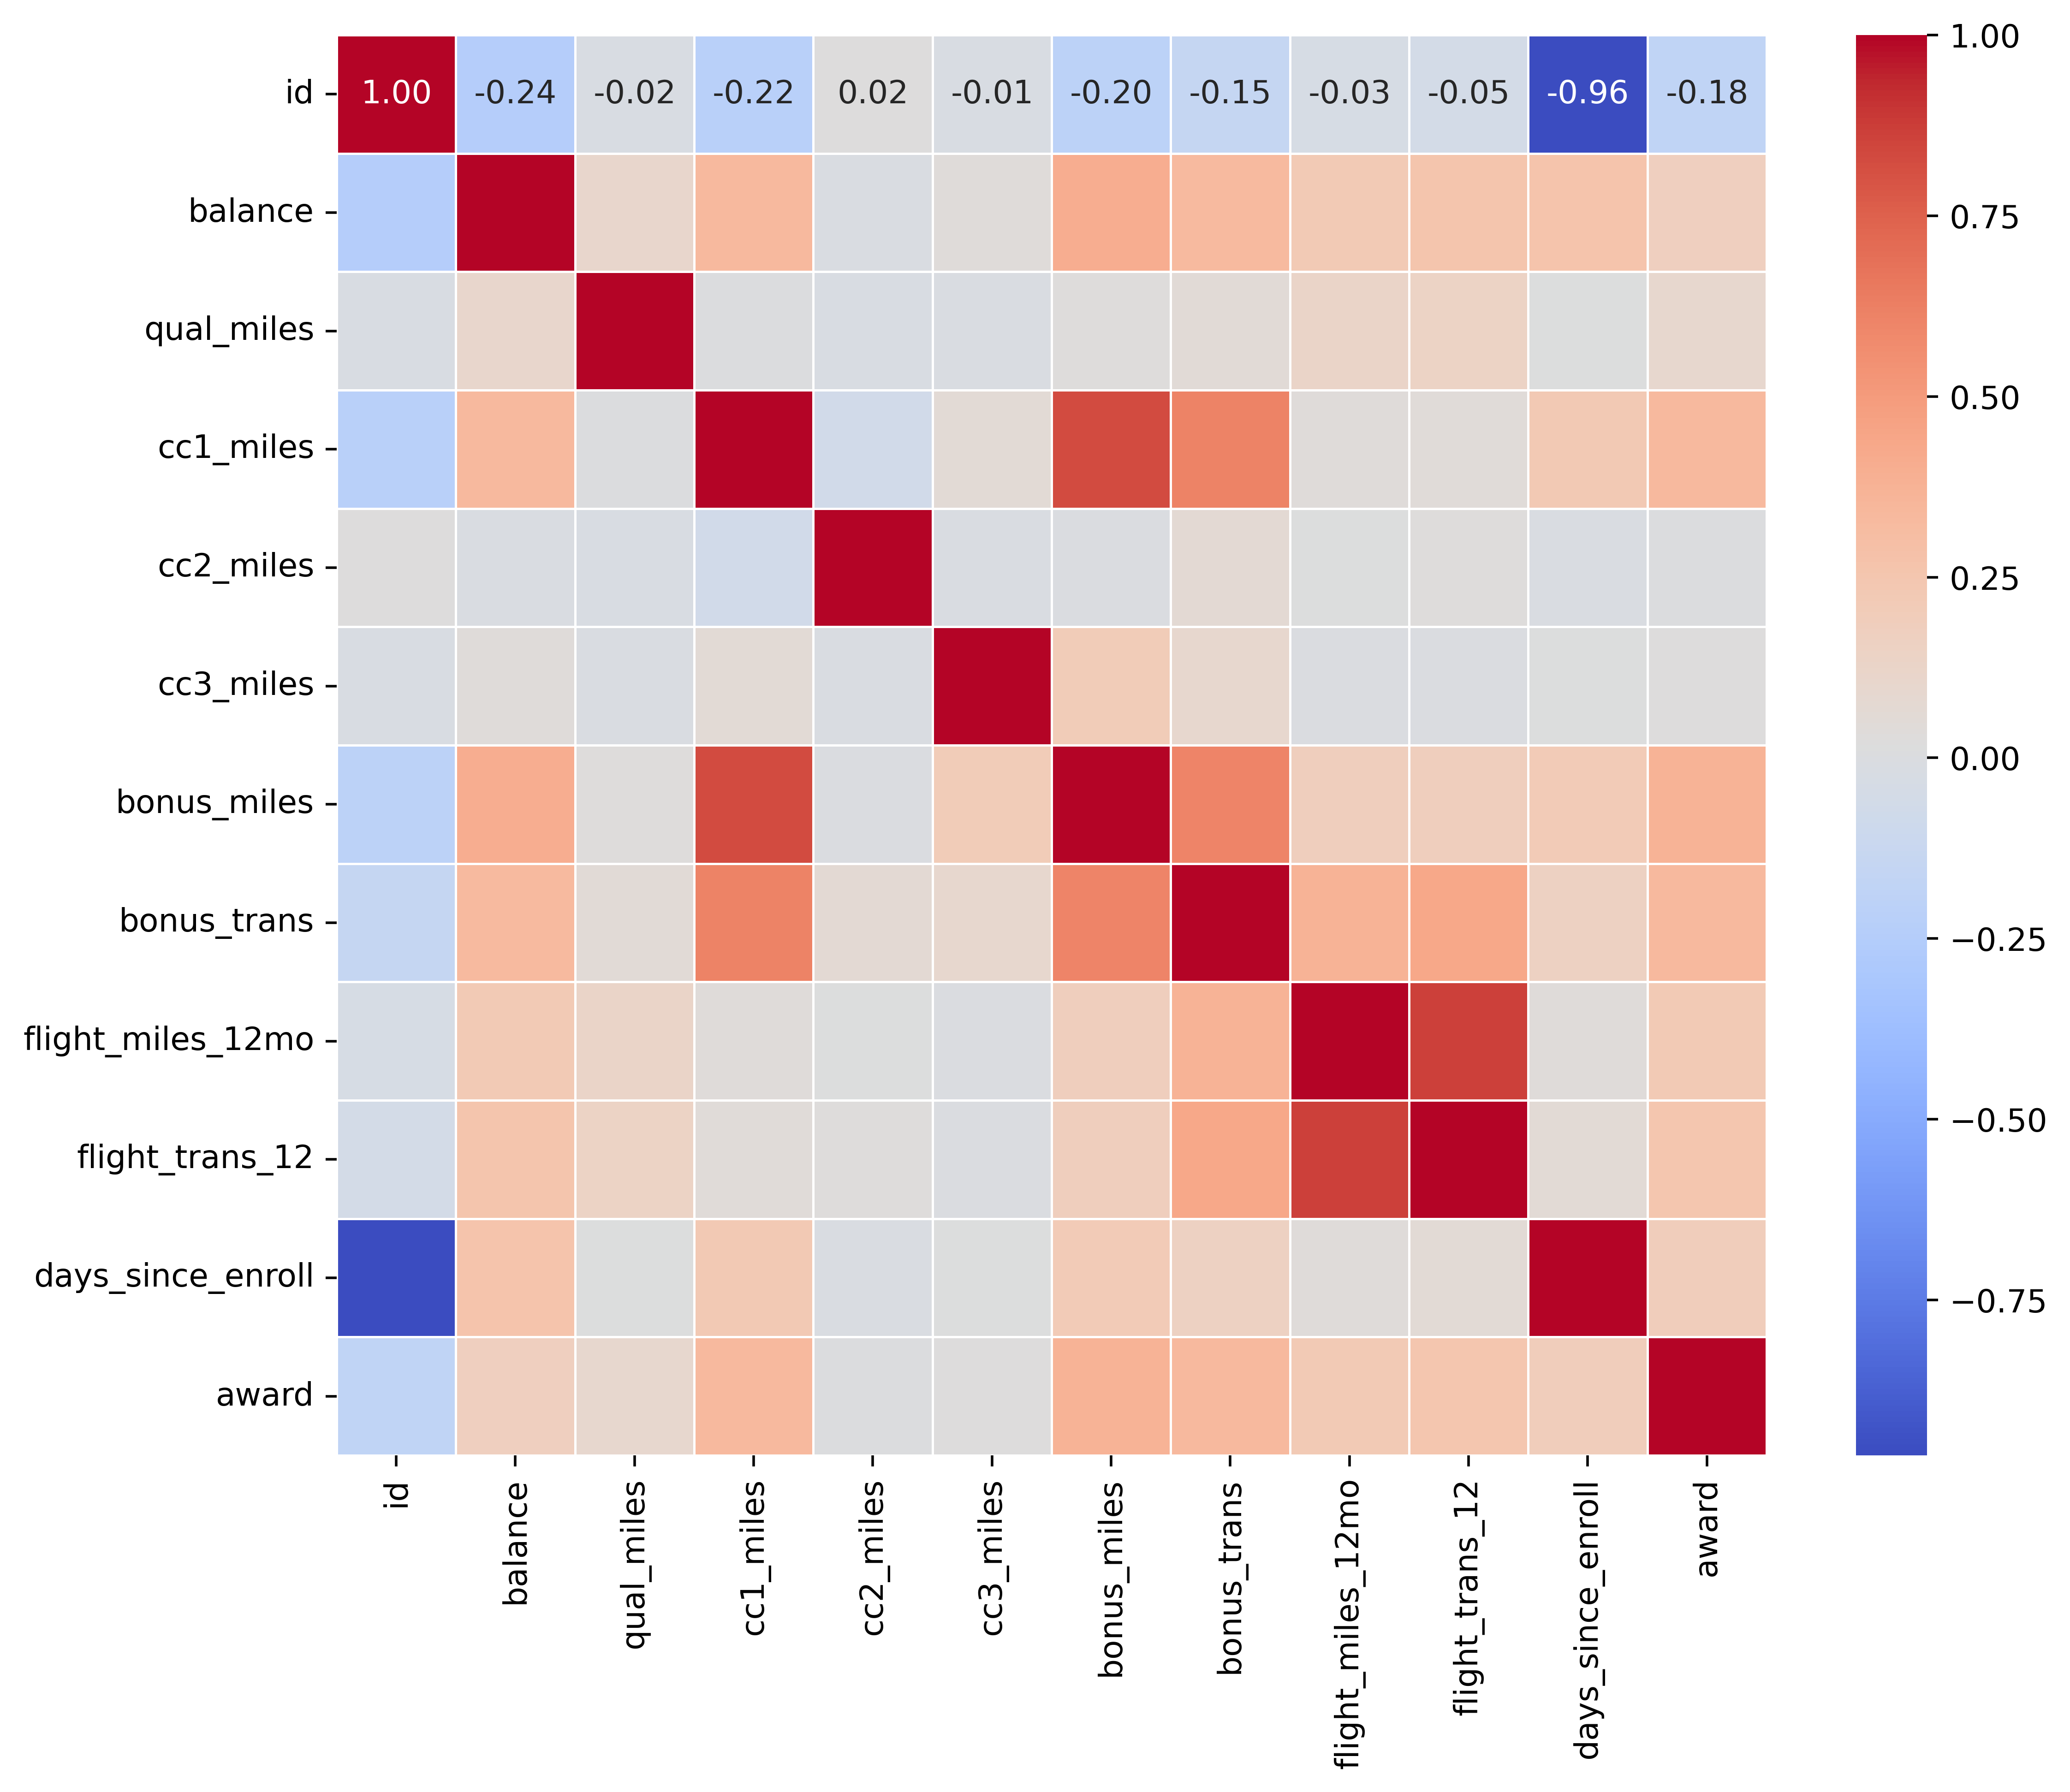

In [15]:
corr_matrix = airlines.corr(method="pearson")
corr_rel = corr_matrix["balance"]
 
plt.figure(figsize=(10,8), dpi=500)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.show()